## EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import plotly.express as px
import seaborn as sns
sns.set()
from sklearn import preprocessing
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

In [3]:
import sys,os
sys.path.insert(0, '../scripts/')
from data_preProcessing import dataProcessor
from data_exploration import dataExplorer
from data_cleaning import dataCleaner

In [4]:
cl_df = pd.read_csv("../data/cleaned_df.csv")
cl_df.head()

,ER,CTR,all_text,LAR,all_objects_count,unique_objects_count,cta_text,cta_width,cta_height,red,green,blue,logo_width,logo_height,eng_width,eng_height,preview_width,preview_height
0,0.209269,0.058438,PHILADELPHIA AREA 1EXUS DEALERS Ovexus L/CERTI...,0.000000,9,2,LEARN MORE,64.0,300.0,23.0,37.0,25.0,0,0,466,77,0,0
1,0.274552,0.074731,Ovexus L/CERTIFIED BY LEXUS PHILADELPHIA AREA ...,0.000000,13,2,LEARN MORE,64.0,300.0,23.0,37.0,25.0,0,0,466,77,0,0
2,0.103688,0.042228,PHILADELPHIA AREA 1 EXUS DEALERS Ovexus L/CERT...,0.000000,11,2,LEARN MORE,50.0,234.0,23.0,37.0,25.0,0,0,380,63,0,0
3,0.136963,0.005393,(= POR OOK aU 2025 PACKAGING COMMITMENT FE...,0.078828,6,4,NaN,79.0,227.0,149.0,78.0,65.0,244,174,0,0,859,627
4,0.114208,0.016443,N THEATERS FUERYWHERPRIL 2024 Te SUS THE NEW A...,0.123817,8,1,Te,60.0,206.0,128.0,191.0,254.0,323,115,0,0,500,600


In [5]:
## create a data expolorer
exp = dataExplorer()

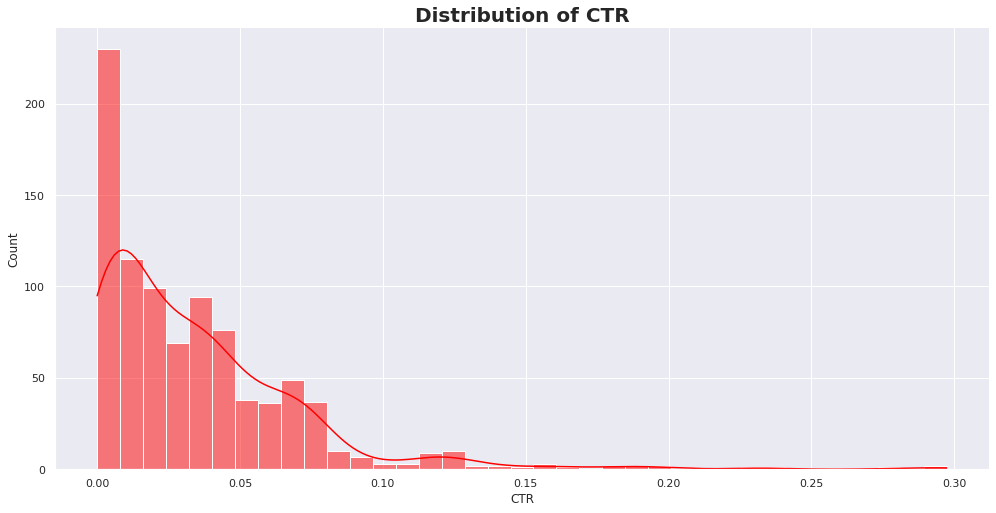

In [6]:
exp.plot_hist(cl_df, 'CTR', 'red')

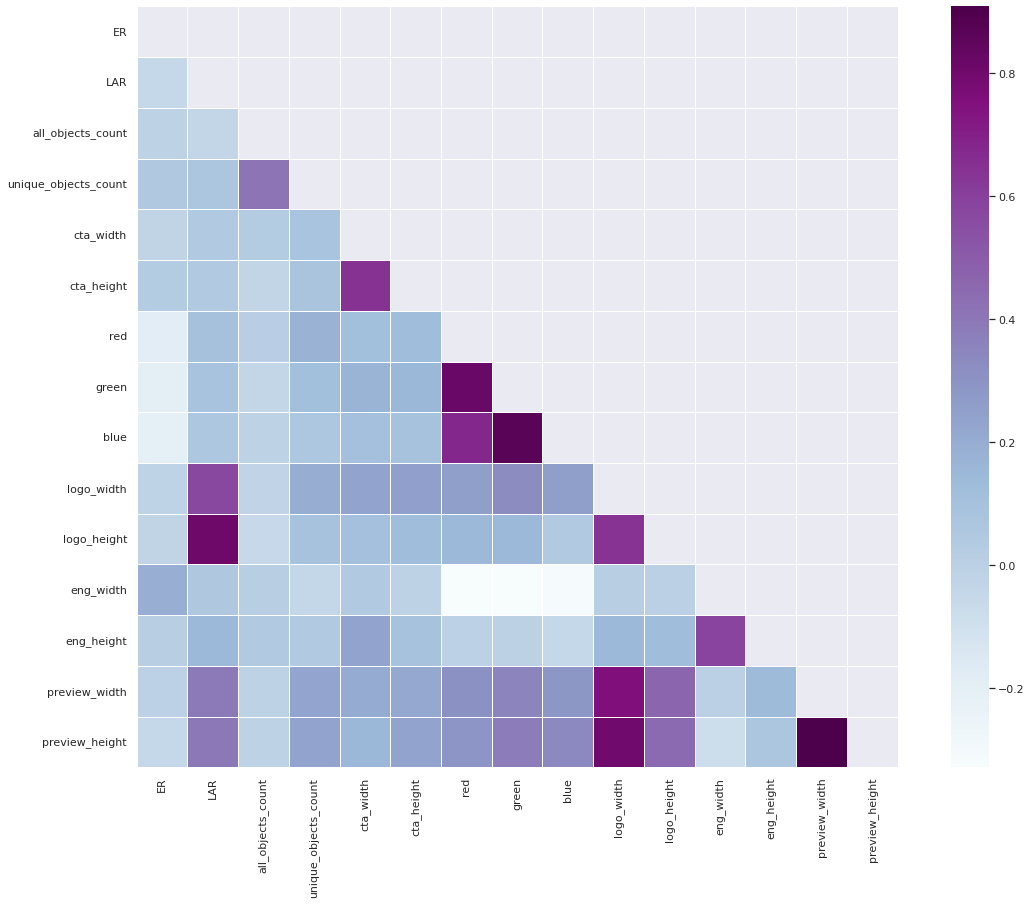

In [7]:
corr_all = cl_df.drop('CTR', axis = 1).corr()
#upper triange
mask = np.zeros_like(corr_all,dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
f,ax = plt.subplots(figsize = (19,14))
sns.heatmap(corr_all, mask = mask, square = True, linewidths = 0.5, ax = ax, cmap = "BuPu")
plt.show()

# Data information

In [8]:
pp = dataProcessor(cl_df)
pp.show_data_information()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ER                    905 non-null    float64
 1   CTR                   905 non-null    float64
 2   all_text              899 non-null    object 
 3   LAR                   905 non-null    float64
 4   all_objects_count     905 non-null    int64  
 5   unique_objects_count  905 non-null    int64  
 6   cta_text              727 non-null    object 
 7   cta_width             789 non-null    float64
 8   cta_height            789 non-null    float64
 9   red                   789 non-null    float64
 10  green                 789 non-null    float64
 11  blue                  789 non-null    float64
 12  logo_width            905 non-null    int64  
 13  logo_height           905 non-null    int64  
 14  eng_width             905 non-null    int64  
 15  eng_height            9

In [9]:
print('unique column values')
cl_df.apply(lambda x: len(x.unique())).sort_values(ascending=False).head(33)

unique column values


ER                      871
CTR                     851
all_text                777
cta_text                300
cta_height              254
LAR                     194
cta_width               167
blue                    138
eng_width               135
logo_width              134
red                     133
logo_height             129
green                   122
eng_height              114
all_objects_count        51
preview_width            39
preview_height           32
unique_objects_count     12
dtype: int64

Categorical/numerical features

In [10]:
# getting dataframe columns list
cols = cl_df.columns.tolist()

In [11]:
# numerical values
num_cols = cl_df._get_numeric_data().columns
num_cols

Index(['ER', 'CTR', 'LAR', 'all_objects_count', 'unique_objects_count',
       'cta_width', 'cta_height', 'red', 'green', 'blue', 'logo_width',
       'logo_height', 'eng_width', 'eng_height', 'preview_width',
       'preview_height'],
      dtype='object')

In [12]:
# catagorical values
list(set(cols) - set(num_cols))

['all_text', 'cta_text']

Label Encoding

In [13]:
from sklearn.preprocessing import LabelEncoder
cols =['cta_text', 'all_text']
#
# Encode labels of multiple columns at once
#
cl_df[cols] = cl_df[cols].apply(LabelEncoder().fit_transform)
#
# Print head
#
cl_df.head()

,ER,CTR,all_text,LAR,all_objects_count,unique_objects_count,cta_text,cta_width,cta_height,red,green,blue,logo_width,logo_height,eng_width,eng_height,preview_width,preview_height
0,0.209269,0.058438,488,0.000000,9,2,126,64.0,300.0,23.0,37.0,25.0,0,0,466,77,0,0
1,0.274552,0.074731,443,0.000000,13,2,126,64.0,300.0,23.0,37.0,25.0,0,0,466,77,0,0
2,0.103688,0.042228,477,0.000000,11,2,126,50.0,234.0,23.0,37.0,25.0,0,0,380,63,0,0
3,0.136963,0.005393,38,0.078828,6,4,299,79.0,227.0,149.0,78.0,65.0,244,174,0,0,859,627
4,0.114208,0.016443,334,0.123817,8,1,191,60.0,206.0,128.0,191.0,254.0,323,115,0,0,500,600


Scaling

In [14]:
scaler = dataProcessor(cl_df)
normalizer = dataProcessor(cl_df)

In [15]:
cols =[
 'ER',
 'CTR',
 'LAR',
 'all_objects_count','unique_objects_count']

df_cc = cl_df.drop(cols, axis=1)

In [16]:
# Using StandardScaler to standardize the all columns
scale_list = df_cc.columns.to_list()
scaler.standardize_column(scale_list)

,ER,CTR,all_text,LAR,all_objects_count,unique_objects_count,cta_text,cta_width,cta_height,red,green,blue,logo_width,logo_height,eng_width,eng_height,preview_width,preview_height
0,0.209269,0.058438,0.405679,0.000000,9,2,-0.554322,-0.319047,-0.096158,-1.248161,-1.330193,-1.208304,-0.720274,-0.437907,1.254846,0.186888,-0.774104,-0.806529
1,0.274552,0.074731,0.204585,0.000000,13,2,-0.554322,-0.319047,-0.096158,-1.248161,-1.330193,-1.208304,-0.720274,-0.437907,1.254846,0.186888,-0.774104,-0.806529
2,0.103688,0.042228,0.356522,0.000000,11,2,-0.554322,-0.408597,-0.658532,-1.248161,-1.330193,-1.208304,-0.720274,-0.437907,0.861965,0.071128,-0.774104,-0.806529
3,0.136963,0.005393,-1.605260,0.078828,6,4,1.317387,-0.223101,-0.718178,0.504076,-0.592815,-0.590318,0.416291,0.688514,-0.874020,-0.449791,1.535708,1.150583
4,0.114208,0.016443,-0.282509,0.123817,8,1,0.148921,-0.344633,-0.897115,0.212037,1.439469,2.329667,0.784278,0.306567,-0.874020,-0.449791,0.570373,1.066305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900,0.365997,0.008790,1.585429,0.000000,4,4,-1.354937,-0.018416,0.781486,0.907369,0.971864,-0.698465,-0.720274,-0.437907,0.729482,0.468019,-0.774104,-0.806529
901,0.103055,0.043215,-0.488072,0.000000,12,3,-0.554322,-0.408597,-0.658532,-1.248161,-1.330193,-1.208304,-0.720274,-0.437907,0.861965,0.071128,-0.774104,-0.806529
902,0.191425,0.038692,-0.671291,0.000000,3,2,-0.229748,-0.389408,-1.178302,0.253757,0.863955,0.491158,-0.720274,-0.437907,0.167571,-0.218272,-0.774104,-0.806529
903,0.073058,0.000057,-1.560572,0.000000,12,5,1.317387,NaN,NaN,NaN,NaN,NaN,-0.720274,-0.437907,-0.874020,-0.449791,-0.774104,-0.806529


Fill missing values

In [25]:
cl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ER                    905 non-null    float64
 1   CTR                   905 non-null    float64
 2   all_text              905 non-null    float64
 3   LAR                   905 non-null    float64
 4   all_objects_count     905 non-null    int64  
 5   unique_objects_count  905 non-null    int64  
 6   cta_text              905 non-null    float64
 7   cta_width             789 non-null    float64
 8   cta_height            789 non-null    float64
 9   red                   789 non-null    float64
 10  green                 789 non-null    float64
 11  blue                  789 non-null    float64
 12  logo_width            905 non-null    float64
 13  logo_height           905 non-null    float64
 14  eng_width             905 non-null    float64
 15  eng_height            9

In [26]:
## fill missing values with median
cl_df['cta_width'] = cl_df['cta_width'].fillna(cl_df['cta_width'].median())
cl_df['cta_height'] = cl_df['cta_height'].fillna(cl_df['cta_height'].median())
cl_df['red'] = cl_df['red'].fillna(cl_df['red'].median())
cl_df['green'] = cl_df['green'].fillna(cl_df['green'].median())
cl_df['blue'] = cl_df['blue'].fillna(cl_df['blue'].median())


In [27]:
cl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ER                    905 non-null    float64
 1   CTR                   905 non-null    float64
 2   all_text              905 non-null    float64
 3   LAR                   905 non-null    float64
 4   all_objects_count     905 non-null    int64  
 5   unique_objects_count  905 non-null    int64  
 6   cta_text              905 non-null    float64
 7   cta_width             905 non-null    float64
 8   cta_height            905 non-null    float64
 9   red                   905 non-null    float64
 10  green                 905 non-null    float64
 11  blue                  905 non-null    float64
 12  logo_width            905 non-null    float64
 13  logo_height           905 non-null    float64
 14  eng_width             905 non-null    float64
 15  eng_height            9

In [28]:
scaler = dataCleaner(scaler.df)
scaler.save_clean_data('../data/model_ready_data.csv')